# Task -1 Anomaly detection
# Deyan Rusev

In [2]:
#!pip install matplotlib
#!pip install pandas
#!pip install seaborn
#!pip install scipy
#!pip install scikit-learn
#!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [14]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


To read dataframe we will use Pandas.

## Read the data

In [79]:
f_path = "/home/didaka/Documents/Identification_of_cyber_attacks/conn_attack.csv"

'''
record ID - The unique identifier for each connection record.
duration_  This feature denotes the number of seconds (rounded) of the connection. For example, a connection for 0.17s or 0.3s would be indicated with a “0” in this field.
src_bytes This field represents the number of data bytes transferred from the source to the destination (i.e., the amount of out-going bytes from the host).
dst_bytes This feature represents the number of data bytes transferred from the destination to the source (i.e., the amount of bytes received by the host).
'''
df = pd.read_csv(f_path,names=["record ID","duration_", "src_bytes","dst_bytes"], header=None)

In [80]:
# we could have nan values in the dataset (issue in the data) lets dropna()
df.dropna()

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450
...,...,...,...,...
256665,256666,0,306,236
256666,256667,0,288,4017
256667,256668,0,289,1096
256668,256669,0,198,2169


Get the head of the data

In [81]:
df.head()

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450


# # Pandas DataFrame

A.  Handling missing data

In [82]:
# determin the missing data precentage
df.apply(lambda x: sum(x.isna()) / len(df))

record ID    0.0
duration_    0.0
src_bytes    0.0
dst_bytes    0.0
dtype: float64

In [83]:
df.shape

(256670, 4)

In [84]:
df.isnull().any().any() # check if we have nan values.

np.False_

In [85]:
df = df.dropna()


In [86]:
df.shape

(256670, 4)

The below code fills any missing values with the mode for that column. We used fill when we have features that do not have all placement in all cases.

In [87]:
df_numeric = df.apply(lambda x: x.fillna(x.mode()),axis=0)

C. Selecting subsets from our data

The loc method selects rows based on the index label. Let’s walk through a quick example.

In [88]:
df.head()

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450


In [89]:
number_range = range(0,200)
print(number_range)

range(0, 200)


In [90]:
subset_loc = df.loc[number_range]
subset_loc#.head()

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450
...,...,...,...,...
195,196,0,264,1356
196,197,0,264,16123
197,198,0,252,344
198,199,0,255,16123


In [91]:
subset_loc.shape

(200, 4)

The iloc method select rows by the index position. This might be used, for example, if the user does not know the index or if the index is not numeric.


Similar to loc

In [92]:
subset_iloc = df.iloc[[0, 1, 2]]
subset_iloc.head()

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364


In [93]:
df.src_bytes

0         236
1         239
2         234
3         239
4         181
         ... 
256665    306
256666    288
256667    289
256668    198
256669    212
Name: src_bytes, Length: 256670, dtype: int64

D. DataFrame "Where" The SQL alternative for searching

In [94]:
df.where(df['src_bytes'] > 240).dropna()

,record ID,duration_,src_bytes,dst_bytes
30,31.0,0.0,278.0,957.0
38,39.0,0.0,257.0,1738.0
60,61.0,0.0,256.0,597.0
61,62.0,0.0,253.0,1906.0
62,63.0,0.0,254.0,555.0
...,...,...,...,...
256663,256664.0,0.0,288.0,3435.0
256664,256665.0,0.0,306.0,244.0
256665,256666.0,0.0,306.0,236.0
256666,256667.0,0.0,288.0,4017.0


In [ ]:
E. Describe

In [95]:
df.describe()

,record ID,duration_,src_bytes,dst_bytes
count,256670.000000,256670.000000,256670.000000,2.566700e+05
mean,128335.500000,0.640936,474.247898,4.473533e+03
std,74094.391134,15.627170,3391.106084,2.080903e+04
min,1.000000,0.000000,0.000000,0.000000e+00
25%,64168.250000,0.000000,217.000000,6.600000e+02
50%,128335.500000,0.000000,249.000000,1.661000e+03
75%,192502.750000,0.000000,306.000000,4.341000e+03
max,256670.000000,3289.000000,54540.000000,7.068759e+06


F. Dataset statistics calculations

In [96]:
#Mean
df['dst_bytes'].mean()

np.float64(4473.532613862158)

In [97]:
df.dst_bytes.median()

np.float64(1661.0)

In [98]:
#Median of two seperate columns
df[["src_bytes", "dst_bytes"]].median()

src_bytes     249.0
dst_bytes    1661.0
dtype: float64

In [99]:
#Instead of the predefined statistics, specific combinations can be calculated
df.agg(
    {
        "duration_": ["min", "max", "median", "skew"],
        "dst_bytes": ["min", "max", "median", "mean"],
    }
)

,duration_,dst_bytes
min,0.000000,0.000000e+00
max,3289.000000,7.068759e+06
median,0.000000,1.661000e+03
skew,74.033196,NaN
mean,NaN,4.473533e+03


G. Grouping

In [100]:
df[["src_bytes", "dst_bytes"]].groupby("src_bytes").std()

,dst_bytes
src_bytes,
0,1530.729507
51,0.000000
137,NaN
138,20112.326825
139,9572.034347
...,...
53208,NaN
53452,3097.127702
53776,NaN


In [101]:
df.groupby(["src_bytes", "dst_bytes"])["duration_"].mean()

src_bytes  dst_bytes
0          0            0.084615
           17520        0.000000
51         8127         4.500000
137        407          0.000000
138        492          0.000000
                          ...   
54060      7300         0.000000
54540      2920         0.000000
           7300         0.000000
           8314         0.092593
           8315         0.000000
Name: duration_, Length: 134353, dtype: float64

## Data exploration

skew:
    
    In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.


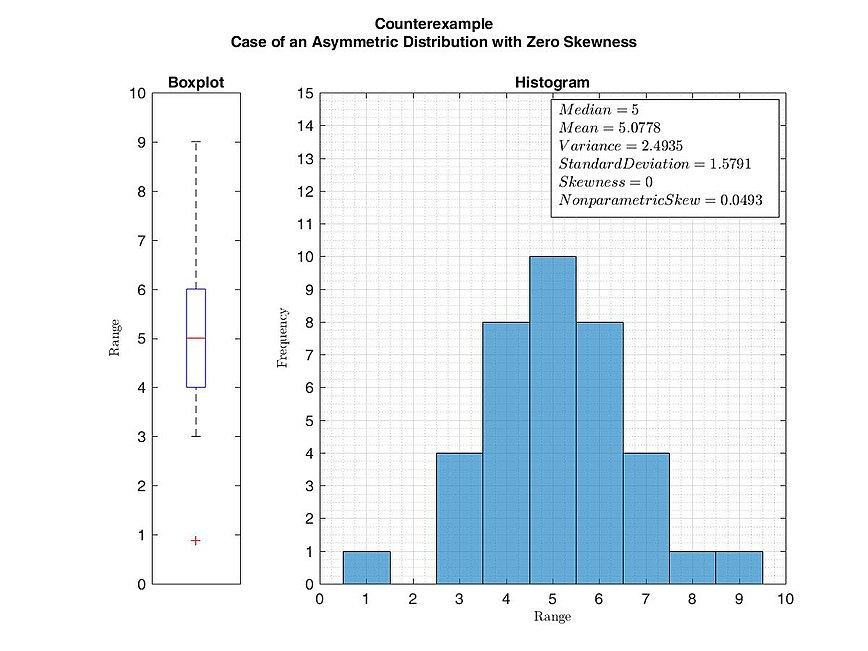

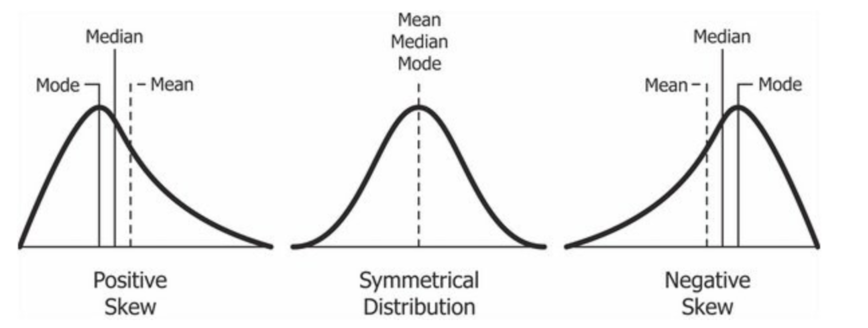

In [102]:
df['src_bytes'].mean()

np.float64(474.2478980792457)

In [103]:
'''
Deviate from the normal distribution.
Have appreciable positive skewness.
Show peakedness.
'''
#skewness and kurtosis
print("Skewness: %f" % df['src_bytes'].skew())
print("Kurtosis: %f" % df['src_bytes'].kurt()) # positive show long tail , negative light tail

Skewness: 15.824471
Kurtosis: 248.739606


Skewness: 207.100418
Kurtosis: 61028.785029


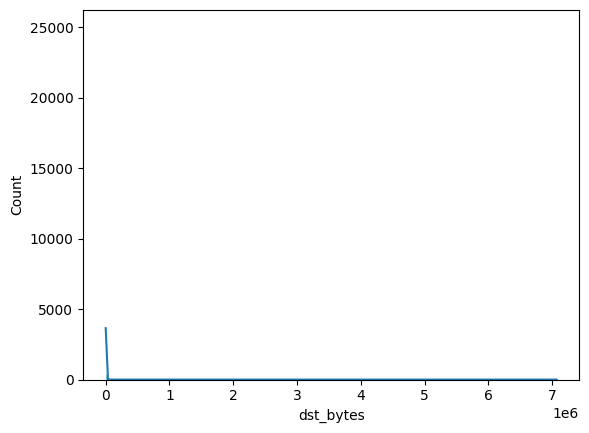

In [40]:
sns.histplot(df['dst_bytes'], kde=True)
print("Skewness: %f" % df['dst_bytes'].skew())
print("Kurtosis: %f" % df['dst_bytes'].kurt())

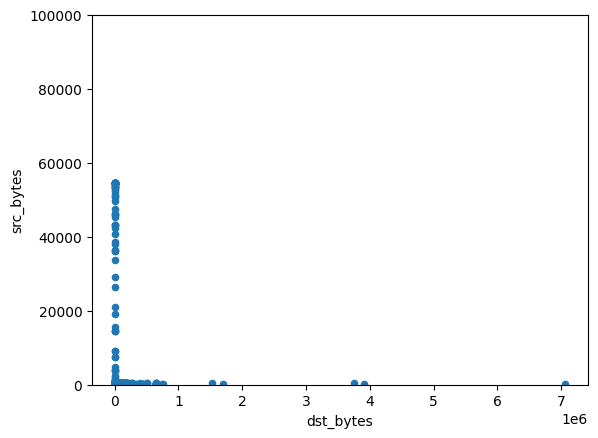

In [109]:
# Relationship with numerical variables
var = 'dst_bytes'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,100000)); # do not `assume here any thing this is just examples

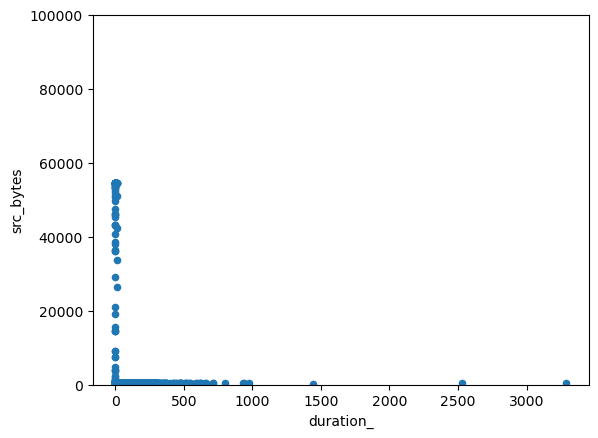

In [36]:
#scatter plot totalbsmtsf/saleprice
var = 'duration_'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,100000));


Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.

In [110]:
df.corr() 

,record ID,duration_,src_bytes,dst_bytes
record ID,1.000000,0.027244,0.019209,-0.002970
duration_,0.027244,1.000000,-0.001714,-0.005791
src_bytes,0.019209,-0.001714,1.000000,0.010770
dst_bytes,-0.002970,-0.005791,0.010770,1.000000


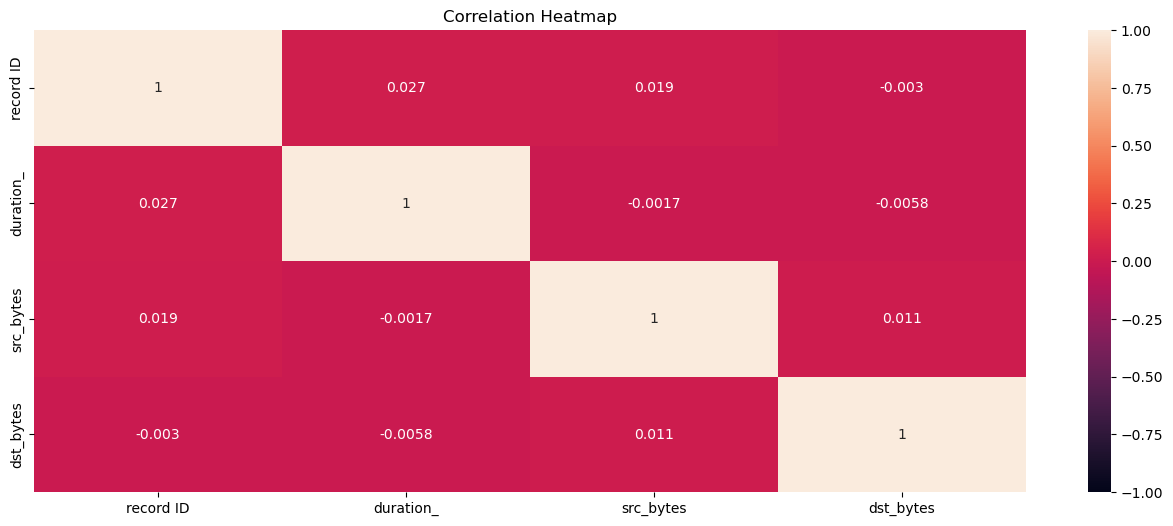

In [38]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

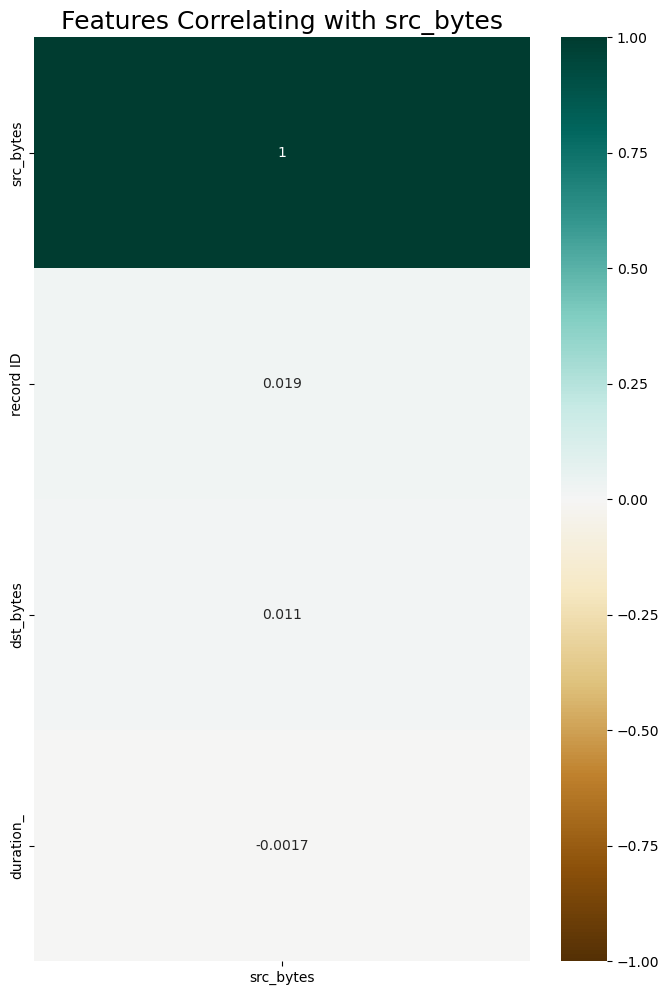

In [39]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['src_bytes']].sort_values(by='src_bytes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with src_bytes', fontdict={'fontsize':18});

# Introduction to ML in python

I will take here a supervided dataset.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
# Load Dataset
X, y = datasets.load_iris(return_X_y=True) # note this is a known dataset with dedicated loader. In your work you can use a custom one.
X.shape, y.shape

((150, 4), (150,))

Let's split the data 80:20

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

print("Train:",X_train.shape, y_train.shape)

print("Test", X_test.shape, y_test.shape)

Train: (120, 4) (120,)
Test (30, 4) (30,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=2)

X_train.shape, y_train.shape

X_test.shape, y_test.shape
'''
When evaluating different settings (“hyperparameters”) for estimators, such as the C 
setting that must be manually set for an SVM, there is still a risk of overfitting
on the test set because the parameters can be tweaked until the estimator performs optimally. 
You can optimize "C" with GridSearch.
'''

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print('the accuracy here is :',clf.score(X_test, y_test))
#let's predict the data
y_predicted = clf.predict(X_test)
# lets review the labels
labels = np.unique(y)
print("unique labels",labels)
# The confusion matrix is:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted, labels=labels)

the accuracy here is : 0.9666666666666667
unique labels [0 1 2]


array([[23,  0,  0],
       [ 0, 16,  0],
       [ 0,  2, 19]])

Here we have a problem:
    
    Our data is trained with non optimized parameters.

How can we solve it?:
     
     cross-validation  + k-Fold
     
     The k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

    A model is trained using  of the folds as training data;

    the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
    

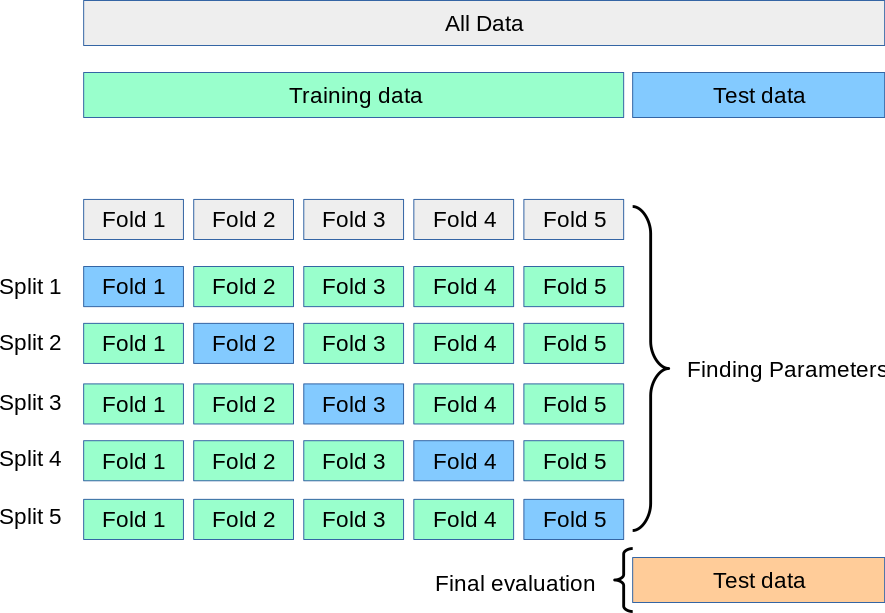

In [6]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print("we are getting in scores the result of each iterration. Len:",len(scores), "values:", scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("NOTE: the result here are different! why? - OVERFITING")

we are getting in scores the result of each iterration. Len: 5 values: [0.96666667 1.         0.96666667 0.96666667 1.        ]
0.98 accuracy with a standard deviation of 0.02
NOTE: the result here are different! why? - OVERFITING


Now let's see how can we use data normalization with this example

In [7]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print("Let's see if the training size effect us ? change from 0.2 to 0.4")
# standardScaler normalization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
print("result score: ",clf.score(X_test_transformed, y_test))


# changing:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)
print("changed")
# standardScaler normalization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
print("result score: ",clf.score(X_test_transformed, y_test))
clf.predict(X_test_transformed)
confusion_matrix(y_test, y_predicted, labels=labels)

Let's see if the training size effect us ? change from 0.2 to 0.4
result score:  1.0
changed
result score:  0.9333333333333333


array([[ 5,  6,  5],
       [10,  6,  7],
       [ 8,  6,  7]])

Lets write it with piplines:

In [8]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, X, y, cv=10) #note -we can use other CV methods see sklearn.


array([1.        , 0.93333333, 1.        , 0.93333333, 1.        ,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

Let's try a different pipline approach

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
classifier_names = ["Logistic Regression", "KNN", "Random Forest","SVM"]

classifiers = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), LinearSVC()]

zipped_clf = zip(classifier_names,classifiers)

In [10]:
def classifier(classifier, t_train, c_train, t_test, c_test):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('standardize', StandardScaler()),                         
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_acc = fit_classifier(checker_pipeline, t_train, c_train, t_test,c_test)
        result.append((n,clf_acc))
    return result

In [11]:
def fit_classifier(pipeline, x_train, y_train, x_test, y_test):
    model_fit = pipeline.fit(x_train, y_train)
    y_pred = model_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [12]:
result = classifier(zipped_clf, X_train, y_train, X_test, y_test)


Validation result for Logistic Regression
LogisticRegression()
accuracy score: 93.33%
Validation result for KNN
KNeighborsClassifier()
accuracy score: 93.33%
Validation result for Random Forest
RandomForestClassifier()
accuracy score: 90.00%
Validation result for SVM
LinearSVC()
accuracy score: 91.67%


Please note in this example we didn't optimize the classifiers.

# :) Back to the task :)

# Supervised Machine Learning

In [15]:
f_path = "/home/didaka/Documents/Identification_of_cyber_attacks/conn_attack.csv"

'''
record ID - The unique identifier for each connection record.
duration_  This feature denotes the number of seconds (rounded) of the connection. For example, a connection for 0.17s or 0.3s would be indicated with a “0” in this field.
src_bytes This field represents the number of data bytes transferred from the source to the destination (i.e., the amount of out-going bytes from the host).
dst_bytes This feature represents the number of data bytes transferred from the destination to the source (i.e., the amount of bytes received by the host).
'''
df = pd.read_csv(f_path,names=["record ID","duration_", "src_bytes","dst_bytes"], header=None)

In [16]:
df.shape

(256670, 4)

In [17]:
labels = pd.read_csv("/home/didaka/Documents/Identification_of_cyber_attacks/conn_attack_anomaly_labels.csv",names=["record ID","label"], header=None)

In [18]:
labels

,record ID,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
256665,256666,0
256666,256667,0
256667,256668,0
256668,256669,0


In [19]:
df_label = labels.label

In [20]:
df_label.values

array([0, 0, 0, ..., 0, 0, 0], shape=(256670,))

In [21]:
labels.shape

(256670, 2)

In [22]:
np.unique(labels.label)

array([0, 1])

1. Create a supervised machine learning (use the labels).


In [23]:
features = ["duration_","src_bytes","dst_bytes"]
X = df[features]
y = df_label.values

In [25]:
X

,duration_,src_bytes,dst_bytes
0,0,236,1228
1,0,239,486
2,0,234,1364
3,0,239,1295
4,0,181,5450
...,...,...,...
256665,0,306,236
256666,0,288,4017
256667,0,289,1096
256668,0,198,2169


In [26]:
y

array([0, 0, 0, ..., 0, 0, 0], shape=(256670,))

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
features = ["duration_","src_bytes","dst_bytes"]
df_label = labels.label
X = df[features]
y = df_label.values
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict(X))

[0 0 0 ... 0 0 0]


In [28]:
clf.predict(X) == y

array([ True,  True,  True, ...,  True,  True,  True], shape=(256670,))

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

features = ["duration_", "src_bytes", "dst_bytes"]

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df_label, test_size=0.2)

# create RandomForetClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

# selecting features
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=features)

# sort features
sorted_features = feature_importance.sort_values(ascending=False)

# select top 2 features based on importance
selected_features = sorted_features[:2].index.tolist()

# get test and train data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# recreate the classifier 
rf_selectedFeatures = RandomForestClassifier(random_state=0)
rf_selectedFeatures.fit(X_train_selected, y_train)

y_predicted = rf_selectedFeatures.predict(X_test_selected)
accuracy = accuracy_score(y_predicted, y_test)

print("accuracy:", accuracy)


accuracy: 0.99998051973351


In [30]:
# Create report
from sklearn.metrics import classification_report

target_names = ['0', '1']
print(classification_report(y_predicted, y_test, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51153
           1       0.99      1.00      1.00       181

    accuracy                           1.00     51334
   macro avg       1.00      1.00      1.00     51334
weighted avg       1.00      1.00      1.00     51334



In [31]:
# K Nearest Neighbors algorithm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

features = ["duration_", "src_bytes", "dst_bytes"]
#Split the data 
X_train, X_test, y_train, y_test = train_test_split(df[features], df_label, test_size=0.2)

#Create KNeighborsClassifier and set number of neighbors to use
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set predictions: {}" .format(clf.predict(X_test)))

#Run model on test data
y_pred = clf.predict(X_test)

#Show test results
print("Accuracy: {:2f}".format(clf.score(X_test, y_test)))
target_names = ['0', '1']
print(classification_report(y_pred, y_test, target_names=target_names))
np.unique(y_pred)

Test set predictions: [0 0 0 ... 0 0 0]
Accuracy: 1.000000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51157
           1       1.00      1.00      1.00       177

    accuracy                           1.00     51334
   macro avg       1.00      1.00      1.00     51334
weighted avg       1.00      1.00      1.00     51334



array([0, 1])

2. What machine learning algorithms did you used? Why did you used them?


In [ ]:
#    RandomForrest
#    K Neaearst Neigbours
# I tried different machine learning algorithms and based on the recall result in 
# generated classification reports I decide which of them to use



4. Feature selection: which feature selection method did you used?

In [ ]:
I used method called importance of features to evaluate feature importance from 3 provided features with the data. 

5. How did you measured the preformance of the machine learning
Note:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


In [ ]:
I used recall to evaluate the performance of the machine learnig algorithm 

6. plot AUC https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_roc_curve.html


Area under curve is 1.0


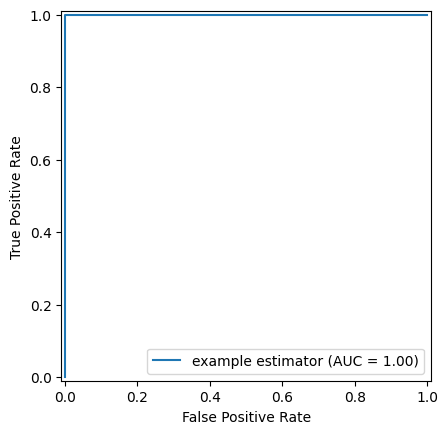

In [32]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn import metrics

#Calculating the roc cureve and auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("Area under curve is " + str(roc_auc))

#Plot the ROC Curve
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, name='example estimator')
display.plot()
plt.show()


7. Following your answer in section (2). Can you improve your results?
NOTE: https://scikit-learn.org/stable/modules/ensemble.html
How much did you improved?

In [69]:
# I can use different clasifiers and combine them for better results
# Example code
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

features = ["duration_", "src_bytes", "dst_bytes"]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[features], df_label, test_size=0.2)

# Create some models to use 
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)

# Train the main model which uses model1 and model2
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(X_train,y_train)

# Test
y_predict = model.predict(X_test)

# Show results
print(model.score(X_test,y_test))
target_names = ['0', '1']
print(classification_report(y_predict, y_test, target_names=target_names))

0.9999610394670199
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51117
           1       0.99      1.00      1.00       217

    accuracy                           1.00     51334
   macro avg       1.00      1.00      1.00     51334
weighted avg       1.00      1.00      1.00     51334



# Unsupervised Learning (without labels)

8.Create Isolation forest algorithm compare your results to the supervised algorith. Measure your preformance using the labels
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [70]:
# Isolation forest algorithm
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
X_train, X_test, y_train, y_test = train_test_split(df[features], df_label, test_size=0.2)

features = ["duration_","src_bytes","dst_bytes"]
X = df[features]
y = df_label.values

# train the model
isolationForest = IsolationForest(contamination='auto', random_state=0).fit(X_train)

# predict test data
predicted_isolations = isolationForest.predict(X_test)

# IsolationForest mark inliners and outliner as -1 and +1,
# so we convert them to 0 and 1 to match true labels values
predicted_isolations = np.where(predicted_isolations == 1, 0, 1)

# Create RandomForest classifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
rfc_predicted = clf.predict(X_test)

# Compare results
target_names = ['0', '1']
print("Isolation Forest classification report")
print(classification_report(predicted_isolations, y_test, target_names=target_names))
print("Random Forest classification report")
print(classification_report(rfc_predicted, y_test, target_names=target_names))


Isolation Forest classification report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     47291
           1       1.00      0.05      0.09      4043

    accuracy                           0.93     51334
   macro avg       0.96      0.52      0.53     51334
weighted avg       0.93      0.93      0.89     51334

Random Forest classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51135
           1       0.99      0.99      0.99       199

    accuracy                           1.00     51334
   macro avg       0.99      1.00      1.00     51334
weighted avg       1.00      1.00      1.00     51334



9. Create DBSCAN algorithm. Measure your preformance using the labels

In [71]:
# DBSCAN
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

#NOTE: TAKES TOO MUCH TIME and sometimes my PC CRASH if hyperparameters set to bigger values

# Clustering with DBSCAN
db = DBSCAN(eps=5, min_samples=10).fit_predict(X)
labels = df_label

# Measure performance
homogeneity = homogeneity_score(labels, db)
completeness = completeness_score(labels, db)
v_measure = v_measure_score(labels, db)
accuracy_dbscan = accuracy_score(labels, db)

# Print results
print("Accuracy: ", accuracy_dbscan)
print("Homogeneity: ", homogeneity)
print("Completeness: ", completeness)
print("V-Measure: ", v_measure)


Accuracy:  0.5634978766509526
Homogeneity:  0.9383284903675527
Completeness:  0.01144643056655671
V-Measure:  0.022616962560036456


10. Can you improve the unsupervised learning without using labels? Please write code?

Silhouette Score: 0.9824839360106087


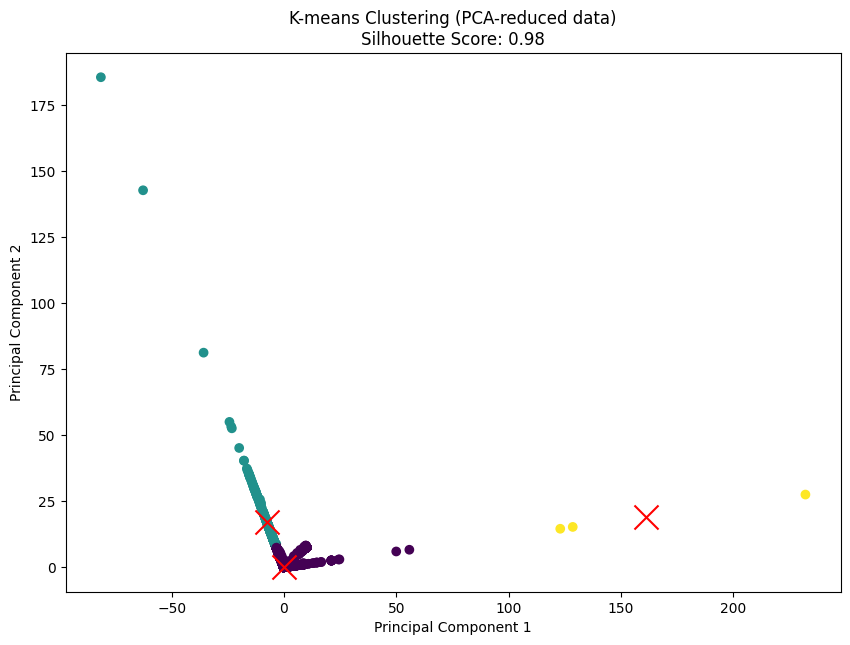

In [72]:
# Use more classification algorithms
# I think that unsupervised learning can be improved without  using labels by using 
# KMeans unsupervised machine learning algorithm used for clustering data into groups based on their similarities.
# Simple code implementation


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Evaluate clustering with silhouette score
silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title(f'K-means Clustering (PCA-reduced data)\nSilhouette Score: {silhouette_avg:.2f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()